Source: https://www.youtube.com/watch?v=JvIzB3hULCo

## Notes 

- for example estimated time of arrival prediction
- lower and upper bound of predicted value -> quantile regression


Typical loss function:
$(y - X\Theta)^2$

Quantile Loss:
$\tau$
Low prediction value -> loss is bigger than zero -> penelize with tau 
High prediction value -> loss is less than zero -> penalize with 1 - tau


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [33]:
def quantile_loss(pred, y_true_, q):
    err = (y_true_ - pred)
    if err >= 0:
        return q * err
    else:
        return (q - 1) * err

In [52]:
def loss(params, x, y_true, q):
    pred = params[0] + params[1] * x
    return np.mean([quantile_loss(pre, y, q) for pre, y in zip(pred, y_true)])

In [66]:
q = 0.1
q2 = 0.9

y_true = np.linspace(-1, 1, 100) + np.random.normal(0, 0.2, 100)
y_pred = np.linspace(-1, 1, 100) + np.random.normal(0, 0.2, 100)

d = minimize(loss, [0, 1, 2], args=(np.linspace(-1, 1, 100), y_true, q))
d2 = minimize(loss, [0, 1, 2], args=(np.linspace(-1, 1, 100), y_true, q2))

In [67]:
t,a = d.x[0], d.x[1]
t2,a2 = d2.x[0], d2.x[1]

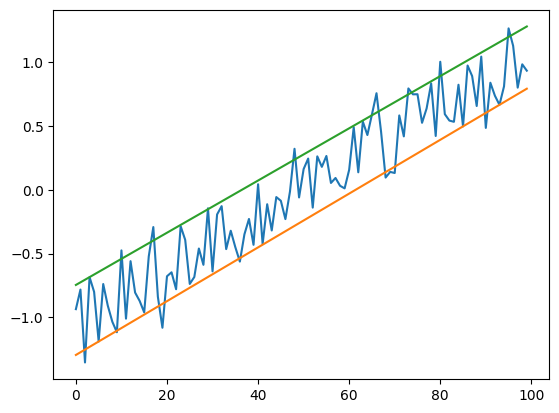

In [68]:
fig, ax = plt.subplots()
ax.plot(y_true)
ax.plot(t + a * np.linspace(-1, 1, 100))
ax.plot(t2 + a2 * np.linspace(-1, 1, 100))
plt.show()